In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## import data

In [6]:
df=pd.read_excel("Employee_income[1].xlsx")

In [7]:
df

,Name,Age,Income
0,Amit,27,70000
1,Akash,29,90000
2,Shriya,29,61000
3,Anita,28,62000
4,Sudhir,42,155000
5,Gajanan,39,160000
6,Ranjit,41,162000
7,Jyotsna,38,156000
8,Nitish,36,130000
9,Onkar,35,136000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    24 non-null     object
 1   Age     24 non-null     int64 
 2   Income  24 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 704.0+ bytes


So there are two numeric column and one categorical column

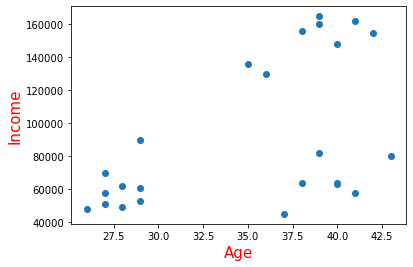

In [91]:
plt.scatter(df.Age,df.Income)
plt.xlabel("Age",fontsize=15,color="r")
plt.ylabel("Income",fontsize=15,color="r")
plt.show()

so visualy see from graph there are 3 clusters are form

## EDA on Name column

In [12]:
df.Name.nunique()

24

In [81]:
df.Name.unique()

array(['Amit', 'Akash', 'Shriya', 'Anita', 'Sudhir', 'Gajanan', 'Ranjit',
       'Jyotsna', 'Nitish', 'Onkar', 'Neeta', 'Yogesh', 'Aniket',
       'Digabar', 'Nitin', 'Shweta', 'Shambhu', 'Aliza', 'Alizya', 'Sid',
       'Abdul', 'Riya', 'Nik', 'John'], dtype=object)

 so these all diff so we can eliminate these column bcoz its not impact on our dataset.

In [13]:
df1=df.drop(columns=["Name"])

In [14]:
df1

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,62000
4,42,155000
5,39,160000
6,41,162000
7,38,156000
8,36,130000
9,35,136000


In [15]:
X=df1

## Feature scaling is required

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
ms=MinMaxScaler()

In [41]:
X_new=ms.fit_transform(X)

## plt the elbow graph

In [42]:
from sklearn.cluster import KMeans

In [43]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X_new)
    wcss.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [85]:
wcss

[5.9897601858860385,
 2.372901455312518,
 0.4920193431403064,
 0.331177199093145,
 0.2563456831364082,
 0.19373235103886324,
 0.1493781843721966,
 0.11815685924083684,
 0.09349698483355756,
 0.0725819496507753]

## PLot the graph

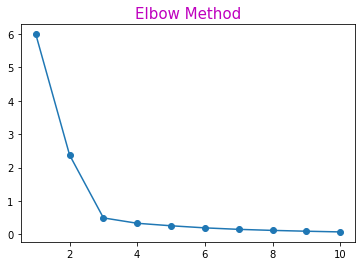

In [83]:
plt.plot(range(1,11),wcss,marker="o")
plt.title("Elbow Method",fontsize=15,color="m")
plt.show()

 so we take k=3 from graph which will give us high performnace.

In [45]:
km=KMeans(n_clusters=3)
km.fit(X_new)

KMeans(n_clusters=3)

In [46]:
X_new

array([[0.05882353, 0.20833333],
       [0.17647059, 0.375     ],
       [0.17647059, 0.13333333],
       [0.11764706, 0.14166667],
       [0.94117647, 0.91666667],
       [0.76470588, 0.95833333],
       [0.88235294, 0.975     ],
       [0.70588235, 0.925     ],
       [0.58823529, 0.70833333],
       [0.52941176, 0.75833333],
       [0.64705882, 0.        ],
       [0.        , 0.025     ],
       [0.05882353, 0.05      ],
       [0.11764706, 0.0375    ],
       [0.17647059, 0.06666667],
       [0.76470588, 1.        ],
       [0.82352941, 0.15      ],
       [0.82352941, 0.15833333],
       [1.        , 0.29166667],
       [0.76470588, 0.30833333],
       [0.88235294, 0.10833333],
       [0.70588235, 0.15833333],
       [0.05882353, 0.10833333],
       [0.82352941, 0.85833333]])

In [47]:
y_pred=km.fit_predict(X_new)

In [74]:
km.cluster_centers_

array([[0.10457516, 0.12731481],
       [0.75      , 0.8875    ],
       [0.80672269, 0.16785714]])

In [76]:
cen

array([[0.10457516, 0.12731481],
       [0.75      , 0.8875    ],
       [0.80672269, 0.16785714]])

In [48]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2,
       0, 1])

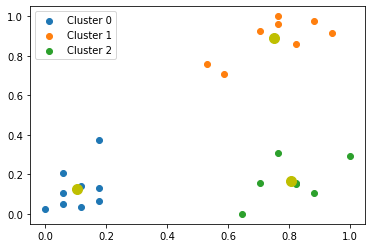

In [79]:
plt.scatter(X_new[y_pred==0,0],X_new[y_pred==0,1],label='Cluster 0')
plt.scatter(X_new[y_pred==1,0],X_new[y_pred==1,1],label ='Cluster 1')
plt.scatter(X_new[y_pred==2,0],X_new[y_pred==2,1],label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='y',s=100)
plt.legend()
plt.show()


In [84]:
km.inertia_

0.4920193431403064

so inertia is low so its better fit for model.